In [2]:
# Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
# Read file
filename = r"stress-strain-avg.csv"
data = pd.read_csv(filename, delim_whitespace=True)
data = np.array(data)
# data
x, y = data[:,1], data[:,2]

In [39]:
data.shape

(49, 3)

Text(0.5, 1.02, 'Stress-strain curve')

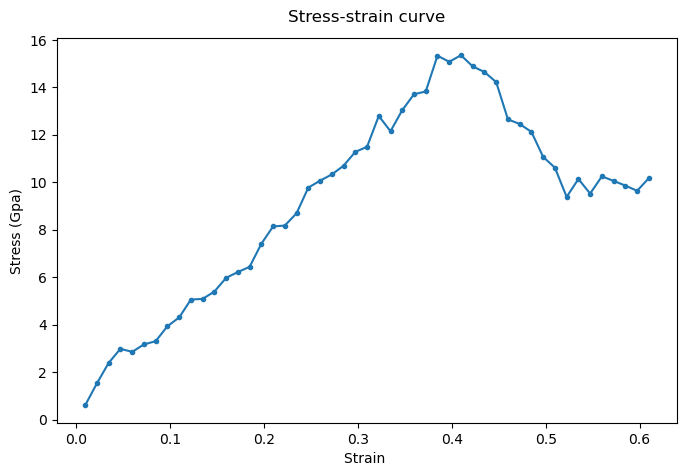

In [40]:
# Set draw
plt.figure(figsize=(8,5))
plt.plot(x,y, linewidth=1.5,marker='o',markersize=3)
plt.xlabel('Strain ')
plt.ylabel('Stress (Gpa)')
plt.title('Stress-strain curve',x=0.5,y=1.02)
# plt.show()

In [41]:
# select the linear part
max_index = np.argmax(y)
x, y = x[:max_index], y[:max_index]

In [42]:
from scipy import stats as st

slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
Youngs = slope
print(f"Young's modulus: {Youngs:.4f} Gpa")

Young's modulus: 36.3580 Gpa


In [24]:
import numpy as np
from numpy.linalg import inv

S = np.array([[1, 0], [0, 1]])
E = np.array([1,2,3,4,5,6])

# C = S @ E.I
E

array([1, 2, 3, 4, 5, 6])

In [25]:
import numpy as np

filename = r"C.log"
data = []
with open('C.log','r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        data.append(line.strip().split())
C = np.matrix(data, np.float64)

matrix([[ 8.19458,  9.22252, 10.57418,  5.75597,  6.87977,  8.48691]])

In [22]:
# Voigt notation
Bv = 1/9 * (C[0,0] + C[1,1] + C[2,2] + 2*(C[0,1] + C[1,2] + C[2,0]))    # bulk modulus
Gv = 1/15 * (C[0,0] + C[1,1] + C[2,2] - (C[0,1] + C[1,2] + C[2,0]) + 3*(C[3,3] + C[4,4] + C[5,5]))  # shear modulus
Ev = 9 * Bv * Gv / (3*Bv + Gv)  # Young's modulus
miu = (3*Bv - 2*Gv) / (6*Bv + 2*Gv) # Poisson's ratio
print("Voigt notation:")
print(f"Bulk modulus: {Bv:.4f} Gpa")
print(f"Shear modulus: {Gv:.4f} Gpa")
print(f"Young's modulus: {Ev:.4f} Gpa")
print(f"Poisson's ratio: {miu:.4f}")

Voigt notation:
Bulk modulus: 1.5571 Gpa
Shear modulus: 1.0657 Gpa
Young's modulus: 2.6032 Gpa
Poisson's ratio: 0.2214
